# __INVESTMENT ANALYSIS ASSIGNMENT__

In [285]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the Companies and rounds data 

In [286]:
#Loading Companies data
companies = pd.read_csv("companies.txt", sep='\t', encoding = 'ISO-8859-1') 
for x in range(0,len(companies['permalink'].values)):
    companies['permalink'].values[x]=companies['permalink'].values[x].lower() #Lower character for entries in 'permalink' cloumn 
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [287]:
# Dropping columns not to be used.
companies.drop(['homepage_url','status','state_code','region','city','founded_at'],axis=1,inplace=True)

In [288]:
len(companies)

66368

In [289]:
companies.head()

,permalink,name,category_list,country_code
0,/organization/-fame,#fame,Media,IND
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
3,/organization/0-6-com,0-6.com,Curated Web,CHN
4,/organization/004-technologies,004 Technologies,Software,USA


In [290]:
print(companies['permalink'].isnull().sum()) # Number of Null entries in 'permalink' column
print(companies['name'].isnull().sum()) # Number of Null entries in 'name' column
print(companies['category_list'].isnull().sum()) # Number of Null entries in 'category_list' column
print(companies['country_code'].isnull().sum()) # Number of Null entries in 'country_code' column

0
1
3148
6958


In [291]:
companies.dropna(inplace=True) #Dropping rows having null values

In [292]:
len(companies)

57803

In [293]:
#Loading Rounds data
rounds2 = pd.read_csv('rounds2.csv', encoding = 'ISO-8859-1')
for x in range(0,len(rounds2['company_permalink'].values)):
    rounds2['company_permalink'].values[x]=rounds2['company_permalink'].values[x].lower() #Lower character for entries in 'company_permalink' cloumn 
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [294]:
len(rounds2)

114949

In [295]:
# Dropping columns not to be used.
rounds2.drop(['funding_round_permalink','funding_round_code','funded_at'],axis=1,inplace=True)

In [296]:
rounds2.head()

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/organization/-qounter,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/organization/-the-one-of-them-inc-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0


In [297]:
print(rounds2['company_permalink'].isnull().sum()) # Number of Null entries in 'company_permalink' column
print(rounds2['funding_round_type'].isnull().sum()) # Number of Null entries in 'funding_round_type' column
print(rounds2['raised_amount_usd'].isnull().sum()) # Number of Null entries in 'raised_amount_usd' column

0
0
19990


In [298]:
rounds2.dropna(inplace=True) #Dropping rows having null values

In [299]:
len(rounds2)

94959

In [300]:
df_temp=rounds2 #Creating a copy of rounds2 DF for subsequent trimming operations

In [301]:
df_temp.head()

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
2,/organization/-qounter,seed,700000.0
3,/organization/-the-one-of-them-inc-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0
6,/organization/01games-technology,undisclosed,41250.0


## Tackling Outliers

### Using Boxplot to visualise raised amount data after removing top 5 %ile for each funding type

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


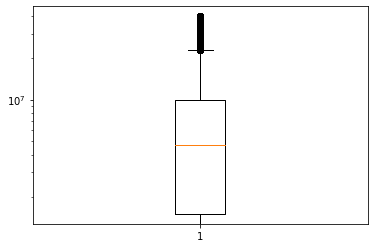

In [302]:
ven_95=(df_temp[df_temp.funding_round_type=='venture']).raised_amount_usd.quantile(0.95)
ang_95=(df_temp[df_temp.funding_round_type=='angel']).raised_amount_usd.quantile(0.95)
seed_95=(df_temp[df_temp.funding_round_type=='seed']).raised_amount_usd.quantile(0.95)
pvt_equity_95=(df_temp[df_temp.funding_round_type=='private_equity']).raised_amount_usd.quantile(0.95)

#Boxplot for raised amount under venture type
a=((df_temp[df_temp.funding_round_type=='venture'])[df_temp.raised_amount_usd<=ven_95])['raised_amount_usd'].values

#Boxplot for raised amount under angel type
#a=((df_temp[df_temp.funding_round_type=='angel'])[df_temp.raised_amount_usd<=ang_95])['raised_amount_usd'].values 

#Boxplot for raised amount under seed type
#a=((df_temp[df_temp.funding_round_type=='seed'])[df_temp.raised_amount_usd<=seed_95])['raised_amount_usd'].values

#Boxplot for raised amount under private_equity type
#a=((df_temp[df_temp.funding_round_type=='private_equity'])[df_temp.raised_amount_usd<=pvt_equity_95])['raised_amount_usd'].values



b=[]
for x in range(0,len(a)):
    if pd.isnull(a[x])==True:
        continue
    else:
        b.append(a[x])


plt.boxplot(b)
plt.yscale('log')
plt.show()

In [303]:
df_temp=df_temp[((df_temp.funding_round_type=='venture') & (df_temp.raised_amount_usd<=ven_95))
       | ((df_temp.funding_round_type=='angel') & (df_temp.raised_amount_usd<=ang_95))
       | ((df_temp.funding_round_type=='seed') & (df_temp.raised_amount_usd<=seed_95))
       | ((df_temp.funding_round_type=='private_equity') & (df_temp.raised_amount_usd<=pvt_equity_95))]

In [304]:
len(rounds2)

94959

In [305]:
rounds2=df_temp
len(rounds2)

76972

In [306]:
rounds2.reset_index(inplace=True, drop=True)

In [307]:
rounds2.tail()

,company_permalink,funding_round_type,raised_amount_usd
76967,/organization/zznode-science-and-technology-co...,venture,1587301.0
76968,/organization/zzzzapp-com,seed,7000.0
76969,/organization/zzzzapp-com,seed,33149.0
76970,/organization/zzzzapp-com,seed,32842.0
76971,/organization/ãasys-2,seed,18192.0


In [308]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76972 entries, 0 to 76971
Data columns (total 3 columns):
company_permalink     76972 non-null object
funding_round_type    76972 non-null object
raised_amount_usd     76972 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.8+ MB


## Checkpoint 1: Data Cleaning 1

### Understand The Data Set

In [309]:
# Unique Companies in rounds2
rounds2['company_permalink'].nunique(dropna=True)

47099

In [310]:
# Unique Companies in companies
companies['permalink'].nunique(dropna=True)

57803

In [311]:
# To check if any companies in the rounds2 file are not present in companies.
rounds2['company_permalink'].isin(companies['permalink']).unique()

array([ True, False])

__Table 1.1__<br>
1. How many __unique companies__ are present in __rounds2__?    - <font color=blue>47099</font>  <br>
2. How many __unique companies__ are present in __companies__?  - <font color=blue>57803</font>  <br>
3. In the __companies__ data frame, which column can be used as the unique key for each company? Write the __name of the column__.-<font color=blue>permalink</font><br>
4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: __Y/N__ - <font color=blue>Y</font>  <br>
5. Merge the two data frames so that all  variables (columns)  in the __companies__ frame are added to the __rounds2__ data frame. Name the merged frame __master_frame__. How many observations are present in master_frame ?<font color=blue>71689</font>  <br>

In [312]:
master_frame=pd.merge(companies, rounds2, how='outer', left_on='permalink', right_on='company_permalink')
master_frame.head(10)

,permalink,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,/organization/-fame,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,seed,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,CHN,/organization/0-6-com,venture,2000000.0
3,/organization/004-technologies,004 Technologies,Software,USA,NaN,NaN,NaN
4,/organization/01games-technology,01Games Technology,Games,HKG,NaN,NaN,NaN
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,seed,43360.0
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,venture,719491.0
7,/organization/0xdata,H2O.ai,Analytics,USA,/organization/0xdata,venture,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,USA,/organization/0xdata,venture,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,USA,/organization/0xdata,venture,8900000.0


In [313]:
master_frame['raised_amount_usd'].describe()

count    7.697200e+04
mean     5.973900e+06
std      1.293712e+07
min      0.000000e+00
25%      3.639720e+05
50%      1.710520e+06
75%      7.000000e+06
max      2.900000e+08
Name: raised_amount_usd, dtype: float64

In [314]:
len(master_frame)

92063

In [315]:
master_frame.isnull().describe()

,permalink,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd
count,92063,92063,92063,92063,92063,92063,92063
unique,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False
freq,86780,86780,86780,86780,76972,76972,76972


In [316]:
master_frame.dropna(inplace=True)
len(master_frame)

71689

## Checkpoint 2: Funding Type Analysis

In [317]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

In [318]:
#Calculating Average funding amount for different funding round type

avg_fund_table= pd.pivot_table(master_frame, values='raised_amount_usd', index='funding_round_type', 
                               aggfunc=np.mean)
print(avg_fund_table)

                    raised_amount_usd
funding_round_type                   
angel                    5.763948e+05
private_equity           4.380341e+07
seed                     5.421401e+05
venture                  7.602163e+06


__Table 2.1__<br>
1. Average funding amount of venture type    - <font color=blue>USD 7,602,163.00 </font>  <br>
2. Average funding amount of angel type  - <font color=blue>USD 576,395.00</font>  <br>
3. Average funding amount of seed type- <font color=blue>USD 542,140.00</font><br>
4. Average funding amount of private equity type - <font color=blue>USD 43,803,410.00</font>  <br>
5. Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them? <font color=blue>Venture Type</font>  <br>

## Checkpoint 3: Country Analysis

In [319]:
# Top nine countries which have received the highest total funding (across ALL sectors for the Venture investment type)

country_fund_table= pd.pivot_table(master_frame[master_frame.funding_round_type == 'venture'], values='raised_amount_usd', index=['country_code','funding_round_type'], 
                               aggfunc=np.sum)

top9=country_fund_table.sort_values('raised_amount_usd', ascending=False).head(9)
top9

,,raised_amount_usd
country_code,funding_round_type,
USA,venture,2.657732e+11
GBR,venture,1.400165e+10
CHN,venture,1.347471e+10
CAN,venture,7.956616e+09
IND,venture,6.981009e+09
ISR,venture,6.021350e+09
FRA,venture,5.566577e+09
DEU,venture,4.188091e+09
CHE,venture,2.027605e+09


__Table 3.1: Analysing the Top 3 English-Speaking Countries__<br>
1. Top English-speaking country    - <font color=blue>United States (USA) </font>  <br>
2. Second English-speaking country  - <font color=blue>United Kingdom (GBR) </font>  <br>
3. Third English-speaking country  - <font color=blue>Canada (CAN)</font><br>

## Checkpoint 4: Sector Analysis 1

In [320]:
mapping = pd.read_csv("mapping.csv", encoding = 'ISO-8859-1') 
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [321]:
# Correcting category_list names replacing '0' with 'na' wherever applicable

mapping['category_list'].values
for x in range(0,len(mapping)):
    if '0' in str(mapping['category_list'].values[x]):
        if '.0' in mapping['category_list'].values[x]:
            mapping['category_list'].values[x]=mapping['category_list'].values[x]
        else:
            mapping['category_list'].values[x]=mapping['category_list'].values[x].replace('0','na')
mapping['category_list'].values

array([nan, '3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alternative Medicine', 'Alumni',
       'Analytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 

In [322]:
# Extracting Primary Sectors.
temp_prim_sect=[]
for x in range(0,len(master_frame)):
    a = str(master_frame['category_list'].values[x]).find('|',0)
    if a==-1:
        temp_prim_sect.append(master_frame['category_list'].values[x])
    else:
        temp_prim_sect.append(master_frame['category_list'].values[x][0:a])


In [323]:
temp_prim_sect[-10:-1]

['E-Commerce',
 'Biotechnology',
 'Biotechnology',
 'Analytics',
 'Analytics',
 'Enterprise Software',
 'Advertising',
 'Advertising',
 'Advertising']

In [324]:
merged_master_frame=master_frame
merged_master_frame['primary_sector']=temp_prim_sect #adding primary_sector column

In [325]:
merged_master_frame.head(7)

,permalink,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,IND,/organization/-fame,venture,10000000.0,Media
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,seed,700000.0,Application Platforms
2,/organization/0-6-com,0-6.com,Curated Web,CHN,/organization/0-6-com,venture,2000000.0,Curated Web
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,seed,43360.0,Biotechnology
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,venture,719491.0,Biotechnology
7,/organization/0xdata,H2O.ai,Analytics,USA,/organization/0xdata,venture,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,Analytics,USA,/organization/0xdata,venture,1700000.0,Analytics


In [326]:
print(mapping.columns)
print(len(mapping.columns))

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')
10


In [327]:
temp1=mapping
temp1.set_index('category_list', inplace=True)

In [328]:
# Mapping primary sector to main sector
temp_main_sect=[]
map_columns=mapping.columns

for x in range(0,len(merged_master_frame)):
    if merged_master_frame['primary_sector'].values[x] not in mapping.index:
        temp_main_sect.append('Blanks') # Assigning 'Others' to the primary sector whichever is not present in mapping.csv
    else:
        b = temp1.loc[merged_master_frame['primary_sector'].values[x]].values
        for y in range(0,len(b)):
            if b[y]==1:
                temp_main_sect.append(map_columns[y])
                break

In [329]:
temp_main_sect[-10:-1]

['Others',
 'Cleantech / Semiconductors',
 'Cleantech / Semiconductors',
 'Social, Finance, Analytics, Advertising',
 'Social, Finance, Analytics, Advertising',
 'Others',
 'Social, Finance, Analytics, Advertising',
 'Social, Finance, Analytics, Advertising',
 'Social, Finance, Analytics, Advertising']

In [330]:
len(temp_main_sect)

71689

In [331]:
merged_master_frame['main_sector']=temp_main_sect

In [332]:
merged_master_frame.head()

,permalink,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,Media,IND,/organization/-fame,venture,10000000.0,Media,Entertainment
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,seed,700000.0,Application Platforms,"News, Search and Messaging"
2,/organization/0-6-com,0-6.com,Curated Web,CHN,/organization/0-6-com,venture,2000000.0,Curated Web,"News, Search and Messaging"
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,seed,43360.0,Biotechnology,Cleantech / Semiconductors
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,venture,719491.0,Biotechnology,Cleantech / Semiconductors


## Checkpoint 5: Sector Analysis 2

In [333]:
D1 = merged_master_frame[(merged_master_frame.country_code=='USA') & (merged_master_frame.funding_round_type=='venture') 
                         & (merged_master_frame.raised_amount_usd>5e+6) & (merged_master_frame.raised_amount_usd<=15e+6)]

In [334]:
D1.reset_index(inplace=True, drop=True)
D1.head()

,permalink,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/0xdata,H2O.ai,Analytics,USA,/organization/0xdata,venture,8900000.0,Analytics,"Social, Finance, Analytics, Advertising"
1,/organization/128-technology,128 Technology,Service Providers|Technology,USA,/organization/128-technology,venture,11999347.0,Service Providers,Others
2,/organization/1366-technologies,1366 Technologies,Manufacturing,USA,/organization/1366-technologies,venture,15000000.0,Manufacturing,Manufacturing
3,/organization/1366-technologies,1366 Technologies,Manufacturing,USA,/organization/1366-technologies,venture,5150000.0,Manufacturing,Manufacturing
4,/organization/1366-technologies,1366 Technologies,Manufacturing,USA,/organization/1366-technologies,venture,12400000.0,Manufacturing,Manufacturing


In [335]:
len(D1) # Total no. of investments in Country1 i.e USA (United States)

10820

In [336]:
D1['raised_amount_usd'].sum() # Total amount (USD) of investments in Country1 i.e USA (United States)

101546584223.0

In [337]:
# Sector-wise count of investments in Country1 i.e USA (United States)
count_D1=D1.groupby('main_sector').count()['permalink']
count_D1.sort_values(ascending=False)

main_sector
Others                                     2618
Social, Finance, Analytics, Advertising    2408
Cleantech / Semiconductors                 2117
News, Search and Messaging                 1403
Health                                      820
Manufacturing                               740
Entertainment                               521
Automotive & Sports                         148
Blanks                                       45
Name: permalink, dtype: int64

In [338]:
# Sector-wise amount of investments in Country1 i.e USA (United States)
amt_D1=D1.groupby('main_sector').sum()['raised_amount_usd'] 
amt_D1.sort_values(ascending=False)

main_sector
Others                                     2.466101e+10
Social, Finance, Analytics, Advertising    2.227738e+10
Cleantech / Semiconductors                 2.029163e+10
News, Search and Messaging                 1.306457e+10
Health                                     7.766859e+09
Manufacturing                              6.963553e+09
Entertainment                              4.749198e+09
Automotive & Sports                        1.359104e+09
Blanks                                     4.132896e+08
Name: raised_amount_usd, dtype: float64

In [339]:
count_D1.loc[D1['main_sector'].values[0]]

2408

In [340]:
# Adding separate columns in D1 Dataframe for Total number of investments and Total amount of investments in each main sector

temp_count1=[]
temp_amt1=[]
for x in range(0,len(D1)):
    temp_count1.append(count_D1[D1['main_sector'].values[x]])
    temp_amt1.append(float(amt_D1[D1['main_sector'].values[x]]))
D1['investment_count']=temp_count1
D1['investment_amount']=temp_amt1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [341]:
D1.head()

,permalink,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector,main_sector,investment_count,investment_amount
0,/organization/0xdata,H2O.ai,Analytics,USA,/organization/0xdata,venture,8900000.0,Analytics,"Social, Finance, Analytics, Advertising",2408,2.227738e+10
1,/organization/128-technology,128 Technology,Service Providers|Technology,USA,/organization/128-technology,venture,11999347.0,Service Providers,Others,2618,2.466101e+10
2,/organization/1366-technologies,1366 Technologies,Manufacturing,USA,/organization/1366-technologies,venture,15000000.0,Manufacturing,Manufacturing,740,6.963553e+09
3,/organization/1366-technologies,1366 Technologies,Manufacturing,USA,/organization/1366-technologies,venture,5150000.0,Manufacturing,Manufacturing,740,6.963553e+09
4,/organization/1366-technologies,1366 Technologies,Manufacturing,USA,/organization/1366-technologies,venture,12400000.0,Manufacturing,Manufacturing,740,6.963553e+09


In [342]:
#For the top sector count-wise (point 3), which company received the highest investment?
Top_sect_count1= count_D1.sort_values(ascending=False).index[0]
aa=D1[D1.main_sector==Top_sect_count1].groupby('name').sum()['raised_amount_usd']
aa.sort_values(ascending=False)[0:5]

name
Virtustream          59300000.0
AirTight Networks    54201907.0
deCarta              52100000.0
Capella Photonics    49968051.0
Bit9                 48433533.0
Name: raised_amount_usd, dtype: float64

In [343]:
# For the second-best sector count-wise (point 4), which company received the highest investment?
Top2_sect_count1= count_D1.sort_values(ascending=False).index[1]
bb= D1[D1.main_sector==Top2_sect_count1].groupby('name').sum()['raised_amount_usd']
bb.sort_values(ascending=False)[0:5]

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Demandbase                         63000000.0
Intacct                            61800000.0
Lotame                             59700000.0
FirstRain                          58344731.0
Name: raised_amount_usd, dtype: float64

In [344]:
D2 = merged_master_frame[(merged_master_frame.country_code=='GBR') & (merged_master_frame.funding_round_type=='venture') 
                         & (merged_master_frame.raised_amount_usd>5e+6) & (merged_master_frame.raised_amount_usd<=15e+6)]

In [345]:
D2.reset_index(inplace=True, drop=True)
D2.head(89)

,permalink,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,GBR,/organization/365scores,venture,5500000.0,Android,"Social, Finance, Analytics, Advertising"
1,/organization/7digital,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,/organization/7digital,venture,8468328.0,Content Creators,Entertainment
2,/organization/7digital,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,/organization/7digital,venture,10000000.0,Content Creators,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,GBR,/organization/90min,venture,15000000.0,Media,Entertainment
4,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,GBR,/organization/90min,venture,5800000.0,Media,Entertainment
5,/organization/abcodia,Abcodia,Biotechnology,GBR,/organization/abcodia,venture,8259067.0,Biotechnology,Cleantech / Semiconductors
6,/organization/acacia-pharma,Acacia Pharma,Biotechnology,GBR,/organization/acacia-pharma,venture,10000000.0,Biotechnology,Cleantech / Semiconductors
7,/organization/acal-energy,ACAL Energy,Clean Technology,GBR,/organization/acal-energy,venture,9910333.0,Clean Technology,Cleantech / Semiconductors
8,/organization/acal-enterprise-solutions,Acal Enterprise Solutions,Information Technology,GBR,/organization/acal-enterprise-solutions,venture,10720178.0,Information Technology,"Social, Finance, Analytics, Advertising"
9,/organization/accent-media-ltd,Accent Media Limited,Domains|Internet|Ticketing,GBR,/organization/accent-media-ltd,venture,8300000.0,Domains,"News, Search and Messaging"


In [346]:
len(D2) # Total no. of investments in Country2 i.e GBR (United Kingdom)

580

In [347]:
D2['raised_amount_usd'].sum() # Total amount (USD) of investments in Country2 i.e GBR (United Kingdom)

5174078691.0

In [348]:
# Sector-wise count of investments in Country2 i.e GBR (United Kingdom)
count_D2=D2.groupby('main_sector').count()['permalink']
count_D2.sort_values(ascending=False)

main_sector
Others                                     136
Cleantech / Semiconductors                 126
Social, Finance, Analytics, Advertising    122
News, Search and Messaging                  66
Entertainment                               50
Manufacturing                               39
Health                                      23
Automotive & Sports                         16
Blanks                                       2
Name: permalink, dtype: int64

In [349]:
# Sector-wise amount of investments in Country2 i.e GBR (United Kingdom)
amt_D2=D2.groupby('main_sector').sum()['raised_amount_usd'] 
amt_D2.sort_values(ascending=False)

main_sector
Others                                     1.228624e+09
Cleantech / Semiconductors                 1.140140e+09
Social, Finance, Analytics, Advertising    1.034404e+09
News, Search and Messaging                 5.807462e+08
Entertainment                              4.527847e+08
Manufacturing                              3.469403e+08
Health                                     2.095375e+08
Automotive & Sports                        1.670516e+08
Blanks                                     1.385039e+07
Name: raised_amount_usd, dtype: float64

In [350]:
# Adding separate columns in D2 Dataframe for Total number of investments and Total amount of investments in each main sector

temp_count2=[]
temp_amt2=[]
for x in range(0,len(D2)):
    temp_count2.append(count_D2[D2['main_sector'].values[x]])
    temp_amt2.append(float(amt_D2[D2['main_sector'].values[x]]))
D2['investment_count']=temp_count2
D2['investment_amount']=temp_amt2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [351]:
D2.head()

,permalink,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector,main_sector,investment_count,investment_amount
0,/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,GBR,/organization/365scores,venture,5500000.0,Android,"Social, Finance, Analytics, Advertising",122,1.034404e+09
1,/organization/7digital,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,/organization/7digital,venture,8468328.0,Content Creators,Entertainment,50,4.527847e+08
2,/organization/7digital,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,/organization/7digital,venture,10000000.0,Content Creators,Entertainment,50,4.527847e+08
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,GBR,/organization/90min,venture,15000000.0,Media,Entertainment,50,4.527847e+08
4,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,GBR,/organization/90min,venture,5800000.0,Media,Entertainment,50,4.527847e+08


In [352]:
#For the top sector count-wise (point 3), which company received the highest investment?
Top_sect_count2= count_D2.sort_values(ascending=False).index[0]
aa=D2[D2.main_sector==Top_sect_count2].groupby('name').sum()['raised_amount_usd']
aa.sort_values(ascending=False)[0:5]

name
Electric Cloud     37000000.0
Enigmatec          32500000.0
SenSage            31250000.0
OpenCloud          27972766.0
MyOptique Group    27694613.0
Name: raised_amount_usd, dtype: float64

In [353]:
# For the second-best sector count-wise (point 4), which company received the highest investment?
Top2_sect_count2= count_D2.sort_values(ascending=False).index[1]
bb=D2[D2.main_sector==Top2_sect_count2].groupby('name').sum()['raised_amount_usd']
bb.sort_values(ascending=False)[0:5]

name
EUSA Pharma                     35600000.0
Horizon Discovery               31353719.0
F-star Biotechnology Limited    29132906.0
Elixent                         25000000.0
Takeda Cambridge                22340000.0
Name: raised_amount_usd, dtype: float64

In [354]:
D3 = merged_master_frame[(merged_master_frame.country_code=='CAN') & (merged_master_frame.funding_round_type=='venture') 
                         & (merged_master_frame.raised_amount_usd>5e+6) & (merged_master_frame.raised_amount_usd<=15e+6)]

In [355]:
D3.reset_index(inplace=True, drop=True)
D3.head()

,permalink,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/2catalyze,2Catalyze,Software,CAN,/organization/2catalyze,venture,6785876.0,Software,Others
1,/organization/360incentives-com,360incentives.com,Software,CAN,/organization/360incentives-com,venture,7650000.0,Software,Others
2,/organization/500px,500px,Apps|Internet|Photography|Promotional|Sales an...,CAN,/organization/500px,venture,8800000.0,Apps,"News, Search and Messaging"
3,/organization/500px,500px,Apps|Internet|Photography|Promotional|Sales an...,CAN,/organization/500px,venture,13000000.0,Apps,"News, Search and Messaging"
4,/organization/6n-silicon,6N Silicon,Concentrated Solar Power|Manufacturing|Solar,CAN,/organization/6n-silicon,venture,5714286.0,Concentrated Solar Power,Cleantech / Semiconductors


In [356]:
len(D3) # Total no. of investments in Country3 i.e CAN (Canada)

382

In [357]:
D3['raised_amount_usd'].sum() # Total amount (USD) of investments in Country3 i.e CAN (Canada)

3399289960.0

In [358]:
# Sector-wise count of investments in Country3 i.e CAN (Canada)
count_D3=D3.groupby('main_sector').count()['permalink']
count_D3.sort_values(ascending=False)

main_sector
Cleantech / Semiconductors                 102
Others                                     100
Social, Finance, Analytics, Advertising     73
News, Search and Messaging                  44
Manufacturing                               28
Health                                      19
Entertainment                               15
Automotive & Sports                          1
Name: permalink, dtype: int64

In [359]:
# Sector-wise amount of investments in Country3 i.e CAN (Canada)
amt_D3=D3.groupby('main_sector').sum()['raised_amount_usd'] 
amt_D3.sort_values(ascending=False)

main_sector
Cleantech / Semiconductors                 965887607.0
Others                                     881137962.0
Social, Finance, Analytics, Advertising    631143075.0
News, Search and Messaging                 410121113.0
Manufacturing                              222633071.0
Health                                     158345064.0
Entertainment                              120022068.0
Automotive & Sports                         10000000.0
Name: raised_amount_usd, dtype: float64

In [360]:
# Adding separate columns in D3 Dataframe for Total number of investments and Total amount of investments in each main sector

temp_count3=[]
temp_amt3=[]
for x in range(0,len(D3)):
    temp_count3.append(count_D3[D3['main_sector'].values[x]])
    temp_amt3.append(float(amt_D3[D3['main_sector'].values[x]]))
D3['investment_count']=temp_count3
D3['investment_amount']=temp_amt3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [361]:
D3.head()

,permalink,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector,main_sector,investment_count,investment_amount
0,/organization/2catalyze,2Catalyze,Software,CAN,/organization/2catalyze,venture,6785876.0,Software,Others,100,881137962.0
1,/organization/360incentives-com,360incentives.com,Software,CAN,/organization/360incentives-com,venture,7650000.0,Software,Others,100,881137962.0
2,/organization/500px,500px,Apps|Internet|Photography|Promotional|Sales an...,CAN,/organization/500px,venture,8800000.0,Apps,"News, Search and Messaging",44,410121113.0
3,/organization/500px,500px,Apps|Internet|Photography|Promotional|Sales an...,CAN,/organization/500px,venture,13000000.0,Apps,"News, Search and Messaging",44,410121113.0
4,/organization/6n-silicon,6N Silicon,Concentrated Solar Power|Manufacturing|Solar,CAN,/organization/6n-silicon,venture,5714286.0,Concentrated Solar Power,Cleantech / Semiconductors,102,965887607.0


In [362]:
#For the top sector count-wise (point 3), which company received the highest investment?
Top_sect_count3= count_D3.sort_values(ascending=False).index[0]
aa=D3[D3.main_sector==Top_sect_count3].groupby('name').sum()['raised_amount_usd']
aa.sort_values(ascending=False)[0:5]

name
Fresco Microchip       48000000.0
Ostara                 43152682.0
Diablo Technologies    35500000.0
Zymeworks              34100000.0
enGene                 31150000.0
Name: raised_amount_usd, dtype: float64

In [363]:
# For the second-best sector count-wise (point 4), which company received the highest investment?
Top2_sect_count3= count_D3.sort_values(ascending=False).index[1]
bb=D3[D3.main_sector==Top2_sect_count3].groupby('name').sum()['raised_amount_usd']
bb.sort_values(ascending=False)[0:5]

name
QuickPlay Media         38700000.0
NewStep Networks        31477853.0
Strangeloop Networks    21500000.0
Morega Systems          20000000.0
LxDATA                  19310000.0
Name: raised_amount_usd, dtype: float64

## Checkpoint 6: Plots

In [364]:
import matplotlib.pyplot as plt

In [365]:
#Calculating Average funding amount for different funding round type

avg_fund_table= pd.pivot_table(master_frame, values='raised_amount_usd', index='funding_round_type', 
                               aggfunc=np.mean)
print(avg_fund_table)

                    raised_amount_usd
funding_round_type                   
angel                    5.763948e+05
private_equity           4.380341e+07
seed                     5.421401e+05
venture                  7.602163e+06


In [366]:
#Calculating Total funding amount for different funding round type
tot_fund_table= pd.pivot_table(master_frame, values='raised_amount_usd', index='funding_round_type', 
                               aggfunc=np.sum)
print(tot_fund_table)

                    raised_amount_usd
funding_round_type                   
angel                    2.405295e+09
private_equity           7.569229e+10
seed                     1.088238e+10
venture                  3.475329e+11


In [367]:
# Inputs for total investment in each funding type.
list1_tot=['angel','venture','seed','private_equity']
list2_tot=[]
for x in range(0,len(list1_tot)):
    list2_tot.append(tot_fund_table.loc[list1_tot[x]].values[0])
# Inputs for fraction of investments for each funding type.
frac= lambda x: 100*x/sum(list2_tot)
list2_frac=[]
for y in range(0,len(list2_tot)):
    list2_frac.append(frac(list2_tot[y]))

In [368]:
# Inputs for average investment in each funding type.
list1_avg=['angel','venture','seed','private_equity']
list2_avg=[]
for x in range(0,len(list1_avg)):
    list2_avg.append(avg_fund_table.loc[list1_avg[x]].values[0]/1e6) # Dividing by 1e6 to get the values in millions

### Plot No. 1

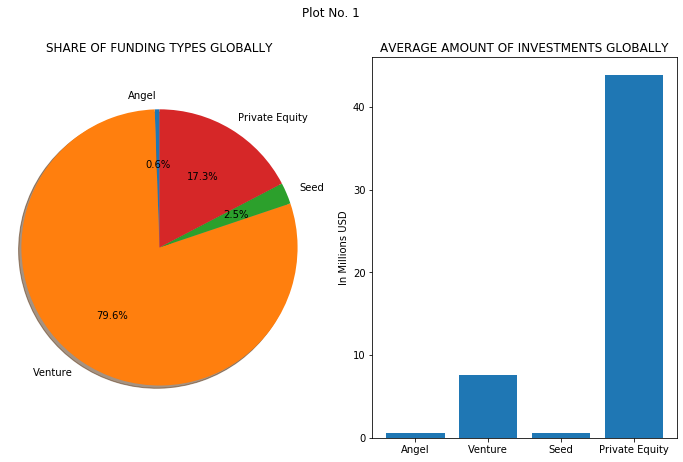

In [369]:
plt.figure(figsize=(12,7))

#Plot showing fraction of investments in each funding type.
plt.subplot(1,2,1)
plt.pie(list2_frac, labels=['Angel','Venture','Seed','Private Equity'], autopct='%1.1f%%', shadow=True, startangle=90, radius=1)
plt.axis('equal')
plt.title('SHARE OF FUNDING TYPES GLOBALLY')


#Plot showing average amount of investments in each funding type.
plt.subplot(1,2,2)
plt.bar(['Angel','Venture','Seed','Private Equity'],list2_avg)
plt.ylabel('In Millions USD')
plt.title("AVERAGE AMOUNT OF INVESTMENTS GLOBALLY")

plt.suptitle('Plot No. 1')
plt.show()

#plt.savefig('Plot1.png', bbox_inches='tight')

In [370]:
# Top nine countries which have received the highest total funding (across ALL sectors for the Venture investment type)

country_fund_table= pd.pivot_table(master_frame[master_frame.funding_round_type == 'venture'], values='raised_amount_usd', index=['country_code','funding_round_type'], 
                               aggfunc=np.sum)

top9=country_fund_table.sort_values('raised_amount_usd', ascending=False).head(9)
top9

,,raised_amount_usd
country_code,funding_round_type,
USA,venture,2.657732e+11
GBR,venture,1.400165e+10
CHN,venture,1.347471e+10
CAN,venture,7.956616e+09
IND,venture,6.981009e+09
ISR,venture,6.021350e+09
FRA,venture,5.566577e+09
DEU,venture,4.188091e+09
CHE,venture,2.027605e+09


### Plot No. 2

In [371]:
# Inputs for plots for Top 9 countries - for Venture data types.
top9_countries=[]
top9_investment=[]
for x in range(0,len(top9)):
    top9_countries.append(top9.index.values[x][0])

for x in top9_countries:
    top9_investment.append(top9.loc[x].values[0][0]/1e9)


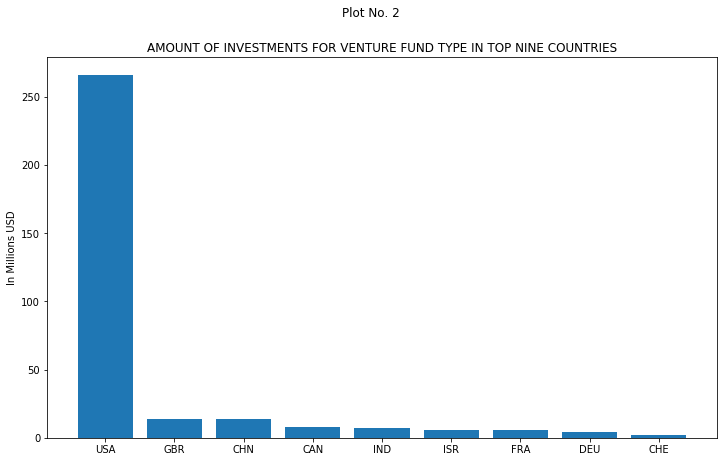

In [372]:
# Plot showing amount of investment for venture fund type in Top 9 countries.
plt.figure(figsize=(12,7))
plt.bar(top9_countries,top9_investment)
plt.ylabel('In Millions USD')
plt.title("AMOUNT OF INVESTMENTS FOR VENTURE FUND TYPE IN TOP NINE COUNTRIES")
plt.suptitle('Plot No. 2')
plt.show()
#plt.savefig('Plot2.png', bbox_inches='tight')

### Plot No. 3

In [373]:
# Inputs for plots for number of investments in the top 3 sectors of the top 3 countries 

# Country1 - USA
top3_sect_D1=list(count_D1.sort_values(ascending=False).index[0:3])
top3_count_D1=[]

for x in top3_sect_D1:
    top3_count_D1.append(count_D1.loc[x])

# Country2 - GBR
top3_sect_D2=list(count_D2.sort_values(ascending=False).index[0:3])
top3_count_D2=[]

for x in top3_sect_D2:
    top3_count_D2.append(count_D2.loc[x])

# Country3 - CAN
top3_sect_D3=list(count_D3.sort_values(ascending=False).index[0:3])
top3_count_D3=[]

for x in top3_sect_D3:
    top3_count_D3.append(count_D3.loc[x])

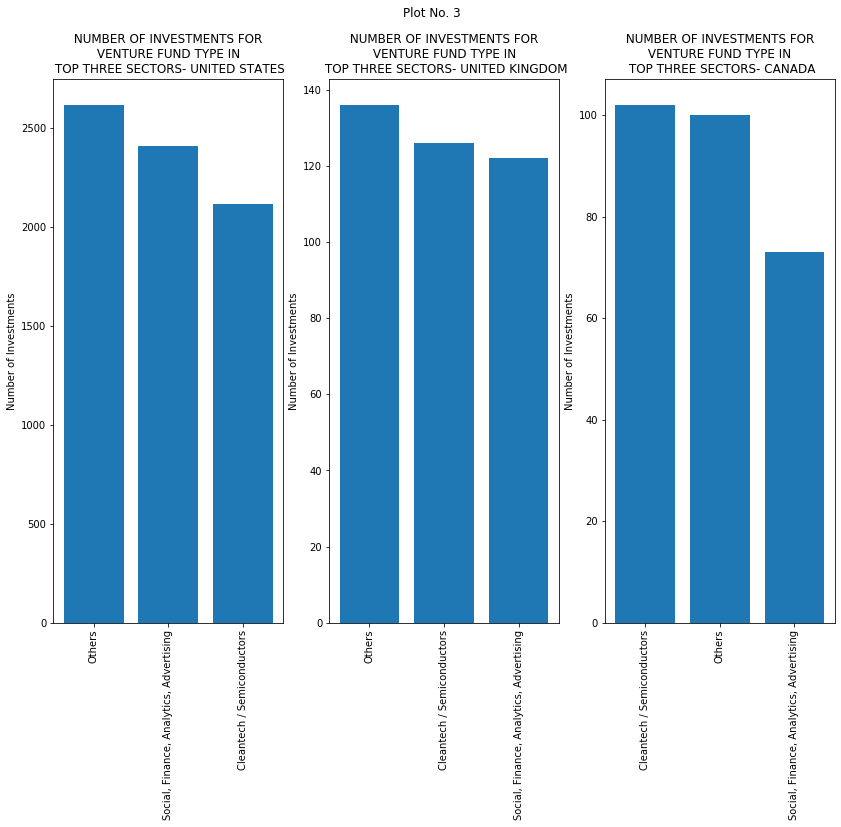

In [374]:
# A plot showing the number of investments in the top 3 sectors of the top 3 countries 
# on one chart (for the Venture investment type )

plt.figure(figsize=(14,10))

# Plot showing number of investments in the top 3 sectors of the Country-1- USA
plt.subplot(1,3,1)
plt.bar(top3_sect_D1,top3_count_D1)
plt.ylabel('Number of Investments')
plt.title("\n NUMBER OF INVESTMENTS FOR \n VENTURE FUND TYPE IN \n TOP THREE SECTORS- UNITED STATES")
plt.xticks(rotation='vertical')

# Plot showing number of investments in the top 3 sectors of the Country-2- GBR
plt.subplot(1,3,2)
plt.bar(top3_sect_D2,top3_count_D2)
plt.ylabel('Number of Investments')
plt.title("\n NUMBER OF INVESTMENTS FOR \n VENTURE FUND TYPE IN \n TOP THREE SECTORS- UNITED KINGDOM")
plt.xticks(rotation='vertical')

# Plot showing number of investments in the top 3 sectors of the Country-3- CAN
plt.subplot(1,3,3)
plt.bar(top3_sect_D3,top3_count_D3)
plt.ylabel('Number of Investments')
plt.title("\n NUMBER OF INVESTMENTS FOR \n VENTURE FUND TYPE IN \n TOP THREE SECTORS- CANADA")
plt.xticks(rotation='vertical')

plt.suptitle('Plot No. 3')
plt.show()
#plt.savefig('Plot3.png', bbox_inches='tight')